# PID + Feedforward Control Instructional Notebook

This notebook is an instructional guide based on real-world experience tuning PID + Feedforward (FF) controllers for industrial processes. The methodology balances theoretical models with empirical adjustments.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import TransferFunction, step
from IPython.display import Image, display

## Section 2: Process Description

We'll define the key variables for our control system including the controlled variable, manipulated variable, disturbance variable, and setpoint variable.

In [2]:
# Define key variables
process_description = {
    "controlled_variable": "Temperature (TY201)",
    "manipulated_variable": "Control Valve Opening (VFD206)",
    "disturbance_variable": "Feed flow rate (TY203)",
    "setpoint_variable": "Setpoint from operator interface"
}

# Display process setup (Fixed syntax error - removed the "4")
for k, v in process_description.items():
    print(f"{k}: {v}")

controlled_variable: Temperature (TY201)
manipulated_variable: Control Valve Opening (VFD206)
disturbance_variable: Feed flow rate (TY203)
setpoint_variable: Setpoint from operator interface


## Section 3: Control Strategy Overview

**Control Strategy:**
- Use PID control to manage the primary loop (TY201).
- Add Feedforward compensation from TY203 to anticipate disturbances.
- Model TY201 response as a function of TY203 using regression or experimental data.

## Section 4: First-Order Process Model and PID Step Response

We'll model our process as a first-order system with transfer function G(s) = K / (τs + 1) and analyze its step response.

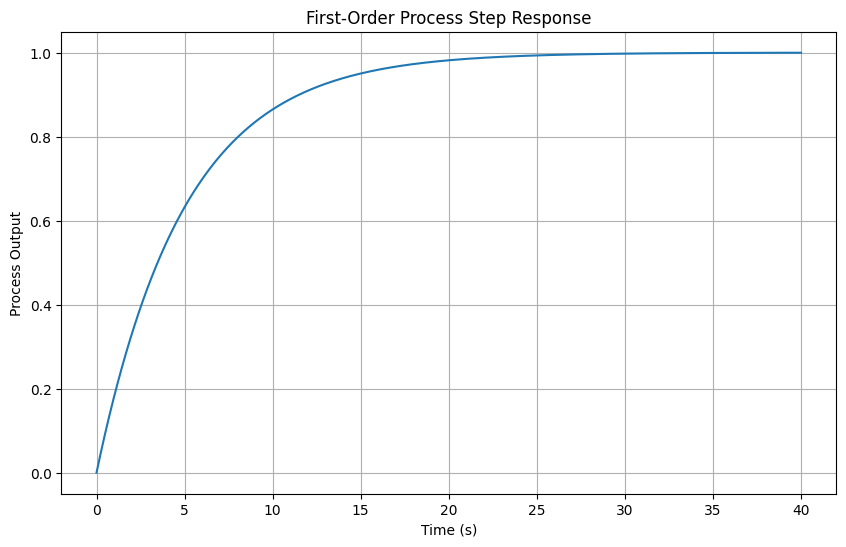

In [3]:
# Define first-order process G(s) = K / (tau*s + 1)
K = 1.0       # Gain
tau = 5.0     # Time constant
num = [K]
den = [tau, 1]
G = TransferFunction(num, den)

# Time vector and step response
time = np.linspace(0, 40, 500)
t, y = step(G, T=time)

plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title("First-Order Process Step Response")
plt.xlabel("Time (s)")
plt.ylabel("Process Output")
plt.grid(True)
plt.show()

## Section 5: Heat Exchanger Model with Nonlinear Regulator

**Model:** Copper inductor submerged in water (electric heat exchanger) with nonlinear actuator (e.g., TRIAC).

**Assumptions:**
- Volume = 0.4 m³, Flow rate = 50 L/s (50 kg/s), Residence time ≈ 8s
- Regulator output is inversely proportional to firing angle (α)
- Power input ∝ (180 - α)/180
- Heat balance: Q_in = m * Cp * dT/dt - Q_loss
- Estimated heat transfer area ≈ 0.2 m² (based on coil geometry)
- Include losses and efficiency: Q_loss = U*A*(T - T_ambient), efficiency < 1

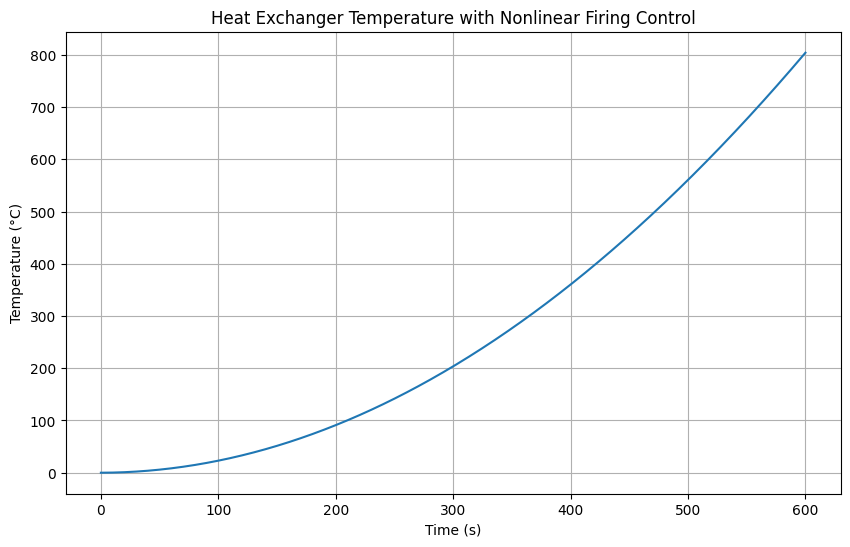

In [4]:
# Parameters
Cp = 4.18       # specific heat (kJ/kg.K)
m = 50.0        # mass flow rate (kg/s)
Pmax = 600.0    # max heater power (kW)
T_ambient = 25  # °C
U = 100         # estimated heat transfer coefficient (W/m²·K)
A = 0.2         # heat exchange area (m²)
efficiency = 0.95

# Time vector
t = np.linspace(0, 600, 600)
alpha = np.linspace(180, 0, len(t))  # simulate ramp-down of firing angle
power_input = Pmax * (180 - alpha) / 180  # non-linear power mapping

# Simulate water temperature in exchanger
T = np.zeros_like(t)
for i in range(1, len(t)):
    Q_loss = U * A * (T[i-1] - T_ambient) / 1000  # convert W to kW
    effective_power = power_input[i] * efficiency
    dTdt = (effective_power - Q_loss) / (m * Cp)
    T[i] = T[i-1] + dTdt

plt.figure(figsize=(10, 6))
plt.plot(t, T)
plt.title("Heat Exchanger Temperature with Nonlinear Firing Control")
plt.xlabel("Time (s)")
plt.ylabel("Temperature (°C)")  # Fixed missing closing parenthesis
plt.grid(True)
plt.show()

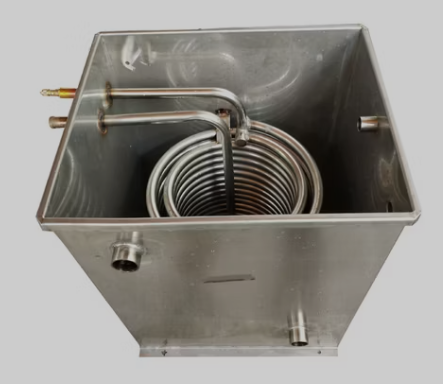

In [5]:
# Display image of heat exchanger (if available)
try:
    display(Image(filename="heaterinductor.png"))
except FileNotFoundError:
    print("Heat exchanger image (heaterinductor.png) not found in current directory")

## Section 6: Power Rectifier Unit (Industrial Source)

This section displays the industrial power rectifier unit that drives the inductor. It provides regulated high-power AC/DC output controlled by firing angle (e.g., SCRs or IGBTs).

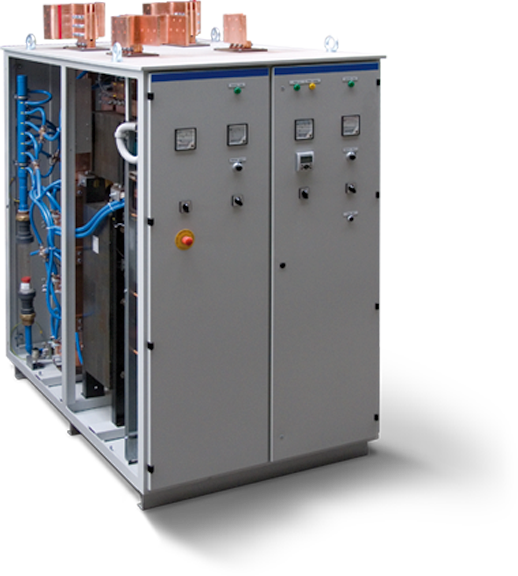

In [6]:
# Display rectifier image (if available)
try:
    display(Image(filename="rectifier.png"))
except FileNotFoundError:
    print("Rectifier image (rectifier.png) not found in current directory")

## Section 7: Feedforward Modeling Placeholder

Placeholder for regression-based or data-derived model of feedforward gain. Use experimental data to fit TY201 = a*TY203 + b, then include in control algorithm.

In [7]:
# Placeholder for feedforward gain calculation
# Example: Linear regression to find relationship between TY203 and TY201
# This would be implemented using actual process data

def calculate_feedforward_gain(ty203_data, ty201_data):
    """
    Calculate feedforward gain using linear regression
    TY201 = a * TY203 + b
    Returns the slope 'a' as the feedforward gain
    """
    # Implementation would go here with real data
    # For now, return a placeholder value
    return 0.5

print("Feedforward gain calculation placeholder added.")

Feedforward gain calculation placeholder added.


## Section 8: Next Steps and To-Do

**Next Steps:**
- Add symbolic model using sympy for more advanced mathematical analysis
- Integrate real data (step test or historical logs) for model validation
- Convert control law to PLC-implementable function block
- Implement actual PID tuning algorithms (Ziegler-Nichols, Cohen-Coon, etc.)
- Add disturbance rejection analysis
- Create real-time simulation environment

**Implementation Notes:**
- Consider practical constraints like actuator saturation and measurement noise
- Validate feedforward compensation effectiveness under various operating conditions
- Document tuning procedures for operators